# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
from datetime import datetime

%matplotlib inline

In [2]:
# Load .env enviroment variables
from pathlib import Path
env_path = Path("C:/Users/Leon/API_Keys/.env")
load_dotenv(env_path)

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Execute Get Request and Store Response in Json Format
btc_response = requests.get(btc_url).json()
eth_response = requests.get(eth_url).json()

# Format Output
print(json.dumps(btc_response, indent=4))
print("*"*100)
print(json.dumps(eth_response, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18560737,
            "total_supply": 18560737,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 19088.39,
                    "volume_24h": 27857192280,
                    "market_cap": 354183349950,
                    "percentage_change_1h": -0.222447493052725,
                    "percentage_change_24h": 3.26364991411744,
                    "percentage_change_7d": 1.78687950601151,
                    "percent_change_1h": -0.222447493052725,
                    "percent_change_24h": 3.26364991411744,
                    "percent_change_7d": 1.78687950601151
                },
                "CAD": {
                    "price": 24660.291041,
                    "volume_24h": 35988706706.532,
                   

In [6]:
# Fetch current BTC price in CAD
btc_price = float(btc_response["data"]["1"]["quotes"]["CAD"]["price"])
# Fetch current ETH price in CAD
eth_price = float(eth_response["data"]["1027"]["quotes"]["CAD"]["price"])

print(btc_price)
print(eth_price)

24660.291041
767.582385


In [7]:
# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
crypto_portfolio_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The total portfolio value of cryptocurrencies is ${crypto_portfolio_value:.2f}")

The current value of your 1.2 BTC is $29592.35
The current value of your 5.3 ETH is $4068.19
The total portfolio value of cryptocurrencies is $33660.54


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [10]:
# Create the Alpaca API object
api = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        api_version="v2")

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2020/12/1", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio_df = api.get_barset(
            tickers,
            timeframe,
            start = today,
            end = today
        ).df

# Preview DataFrame
portfolio_df

AGG                                     SPY  \
                             open   high     low   close   volume    open   
time                                                                        
2020-12-01 00:00:00-05:00  118.03  118.1  117.73  117.84  4308362  365.57   

                                                             
                             high     low   close    volume  
time                                                         
2020-12-01 00:00:00-05:00  367.68  364.93  365.97  64527332

In [12]:
# Pick AGG and SPY close prices
agg_close_price = float(portfolio_df["AGG"]["close"])
spy_close_price = float(portfolio_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.84
Current SPY closing price: $365.97


In [13]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
portfolio_value = my_agg_value + my_spy_value

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The total portfolio value of shares and bonds is ${portfolio_value:.2f}")

The current value of your 200 AGG shares is $23568.00
The current value of your 50 SPY shares is $18298.50
The total portfolio value of shares and bonds is $41866.50


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame({"amount":[crypto_portfolio_value, portfolio_value]}, index =["crypto", "shares"])

# Display savings DataFrame
df_savings

amount
crypto  33660.53589
shares  41866.50000

<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='amount'>

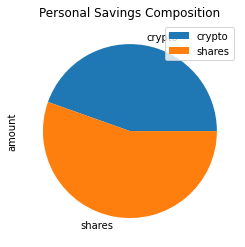

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings Composition")

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_saving = crypto_portfolio_value + portfolio_value

# Validate saving health
if total_saving > emergency_fund:
    print("Congratulating! You have enough money in this fund.")
elif total_saving == emergency_fund:
    print("Congratulating! You have reached the financial goal.")
elif total_saving < emergency_fund:
    deficit = emergency_fund - total_saving
    print(f"You are ${deficit} away from reaching the financial goal") 

Congratulating! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
            tickers,
            timeframe,
            start = start_date,
            end = end_date
        ).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [20]:
# Printing the simulation input data
MC_thirtyyears.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4          5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     0.991312  0.988958  1.006141  0.994201  1.000122   1.001367  1.014068   
2     0.989395  0.984948  1.000435  0.999620  1.013715   1.014699  1.013251   
3     0.997611  0.977913  1.014364  1.000938  1.031005   1.005146  1.019936   
4     0.998913  0.981503  1.015397  1.009326  1.041468   1.001564  1.013770   
...        ...       ...       ...       ...       ...        ...       ...   
7556  7.981442  2.919965  9.198927  7.081517  6.939560  16.070575  7.123582   
7557  8.027709  2.939266  9.208659  7.101902  7.000299  16.038178  7.123936   
7558  8.028731  2.904369  9.212097  7.085889  7.003654  16.024966  7.126684   
7559  7.974248  2.926694  9.234600  7.107277  6.912960  15.891347  7.066495   
7560  7.947259  2.950211  9.103984  6.993244  6.890109  15.838321  7.138984   

            7         8          9    ...       490        491        492  \
0      1.000000  1.000000   1.000000  ...  1.000000   1.000000   1.000000   
1      0.998706  1.000522   0.987107  ...  1.006079   1.019415   1.004766   
2      0.994079  0.999804   0.979283  ...  0.999781   1.013710   0.985372   
3      0.990156  0.999672   0.975972  ...  0.998131   1.018680   0.985046   
4      0.984997  1.012698   0.981836  ...  0.986902   1.027971   0.992718   
...         ...       ...        ...  ...       ...        ...        ...   
7556  13.539267  5.263363  12.293387  ...  2.205907  14.425668  10.958878   
7557  13.550732  5.305050  12.495434  ...  2.215762  14.442001  10.855530   
7558  13.510098  5.290647  12.346935  ...  2.220878  14.604400  10.795095   
7559  13.663343  5.233747  12.354930  ...  2.250312  14.696320  10.641486   
7560  13.631319  5.236086  12.356544  ...  2.266870  14.861408  10.605990   

            493       494        495       496       497        498       499  
0      1.000000  1.000000   1.000000  1.000000  1.000000   1.000000  1.000000  
1      1.004148  0.985910   0.997457  1.004778  0.981623   0.996819  1.000594  
2      1.005172  0.997366   0.984759  1.001591  0.978521   1.004300  1.004560  
3      1.005817  1.005611   0.976221  0.994456  0.984509   0.994154  1.005427  
4      1.001701  1.004982   0.975759  1.003380  0.989993   0.988077  1.017026  
...         ...       ...        ...       ...       ...        ...       ...  
7556  18.677238  2.519242  11.273469  5.218430  6.472887  14.496085  9.305247  
7557  18.799144  2.523715  11.360496  5.204397  6.450076  14.505622  9.340013  
7558  18.592887  2.527763  11.446949  5.190852  6.549080  14.540035  9.309590  
7559  18.453925  2.544364  11.360092  5.171831  6.608061  14.468305  9.326942  
7560  18.596215  2.546706  11.366435  5.106143  6.610911  14.535157  9.247906  

[7561 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

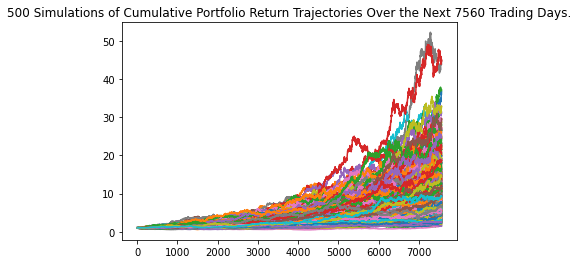

In [22]:
# Plot simulation outcomes
MC_thirtyyears.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

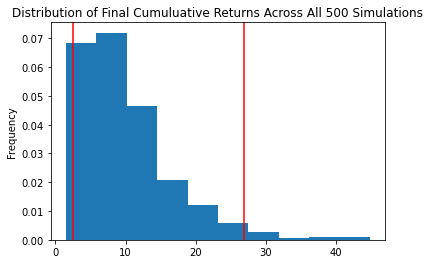

In [23]:
# Plot probability distribution and confidence intervals
MC_thirtyyears.plot_distribution()

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyears.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             10.006274
std               6.581942
min               1.471328
25%               5.326536
50%               8.216433
75%              12.758602
max              44.831718
95% CI Lower      2.433063
95% CI Upper     26.866265
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48661.27 and $537325.3


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = round(tbl[8]*initial_investment2, 2)
ci_upper2 = round(tbl[9]*initial_investment2, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $72991.9 and $805987.94


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.1,0.9],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.010111  0.983461  1.002339  1.013491  1.007562  1.026011  1.000631   
2     1.025238  0.972651  1.011602  1.011258  1.020326  1.015480  1.005947   
3     1.022833  0.969924  1.022010  1.005736  1.034968  1.007424  1.016324   
4     1.023927  0.961599  1.010746  1.016972  1.033369  0.997648  1.006012   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.041351  1.517398  1.247520  1.181115  1.630684  2.427263  1.341038   
1257  1.047865  1.496886  1.251663  1.198163  1.628502  2.466903  1.318604   
1258  1.057506  1.477844  1.279319  1.208242  1.630585  2.443239  1.323345   
1259  1.074035  1.476999  1.291248  1.221215  1.618317  2.481467  1.299694   
1260  1.067254  1.478757  1.311200  1.230547  1.618894  2.434222  1.298402   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.992764  1.007524  1.007262  ...  0.979846  0.997938  0.980344   
2     0.997473  1.006889  0.987234  ...  0.971310  0.996280  0.964490   
3     0.992393  1.016326  0.975291  ...  0.977679  0.997299  0.965228   
4     0.981017  1.015205  0.994449  ...  0.984350  0.988127  0.974910   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.295159  0.862026  2.456552  ...  3.470762  3.287246  2.401933   
1257  1.285099  0.871251  2.458378  ...  3.521337  3.301690  2.410023   
1258  1.274552  0.871183  2.477702  ...  3.548650  3.265962  2.414961   
1259  1.304256  0.868722  2.486781  ...  3.579931  3.245710  2.402990   
1260  1.283057  0.874542  2.516136  ...  3.585510  3.243316  2.383283   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.019251  0.999264  0.998023  0.995942  1.001461  0.997981  1.002258  
2     1.002631  0.984497  0.994061  0.993563  0.986365  1.006104  1.001205  
3     1.015976  0.990475  0.998824  1.008354  1.005331  0.982780  1.010076  
4     1.001568  1.008248  0.991481  1.009318  1.001850  0.984294  1.012242  
...        ...       ...       ...       ...       ...       ...       ...  
1256  2.337267  1.870264  1.253597  0.550418  1.365476  1.112714  1.238074  
1257  2.326314  1.848985  1.226200  0.550988  1.386900  1.128174  1.264228  
1258  2.341904  1.885515  1.204032  0.545485  1.380594  1.128671  1.271756  
1259  2.316453  1.863842  1.206154  0.540860  1.385525  1.124093  1.271130  
1260  2.300911  1.883080  1.196046  0.547560  1.407697  1.139992  1.267829  

[1261 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

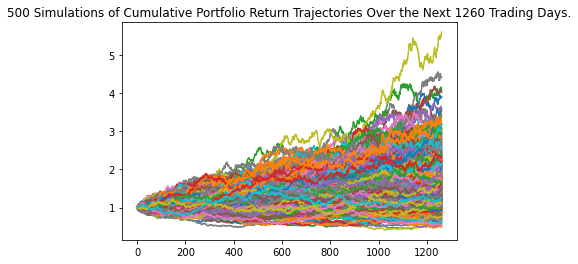

In [29]:
# Plot simulation outcomes
MC_fiveyears.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

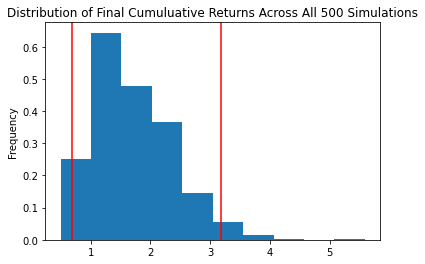

In [30]:
MC_fiveyears.plot_distribution()

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.706244
std               0.684367
min               0.496275
25%               1.199708
50%               1.600117
75%               2.109586
max               5.589909
95% CI Lower      0.691046
95% CI Upper      3.189220
Name: 1260, dtype: float64


In [32]:
# Set initial investment
initial_investment_five = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment_five, 2)
ci_upper_five = round(tbl_five[9]*initial_investment_five, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $41462.73 and $191353.22


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2,0.8],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.991487  0.988886  1.007610  0.993930  0.993809  0.995600  1.007180   
2     0.993528  0.985720  1.023070  1.002783  1.002404  0.990763  1.016099   
3     0.999424  0.996952  1.021630  1.012091  0.986305  0.966211  1.007550   
4     0.999234  0.997819  1.028979  1.019183  0.990549  0.947956  1.011954   
...        ...       ...       ...       ...       ...       ...       ...   
2516  5.692079  2.911426  3.530643  1.746223  1.748816  2.172878  1.198069   
2517  5.581323  2.860144  3.527354  1.741898  1.777518  2.163451  1.191549   
2518  5.620462  2.843266  3.581858  1.751903  1.776455  2.185589  1.183405   
2519  5.632155  2.836992  3.596851  1.738549  1.786312  2.211042  1.177662   
2520  5.587483  2.879672  3.572478  1.743716  1.768780  2.211692  1.171641   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.998477  1.010264  1.002455  ...  0.987225  0.997706  1.007163   
2     1.010330  1.005258  1.005166  ...  0.974470  1.000373  1.001469   
3     1.006726  1.007375  1.011685  ...  0.973282  1.007559  1.004237   
4     1.006426  1.017152  1.019793  ...  0.965937  1.005016  0.985447   
...        ...       ...       ...  ...       ...       ...       ...   
2516  3.336215  4.857609  2.238627  ...  1.867911  2.466280  2.176786   
2517  3.375230  4.944801  2.207765  ...  1.891106  2.475471  2.157262   
2518  3.389458  4.983067  2.203940  ...  1.850242  2.477944  2.170925   
2519  3.341577  4.962908  2.190468  ...  1.853941  2.501387  2.188054   
2520  3.281382  5.029520  2.196385  ...  1.851241  2.487162  2.223877   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.988582  1.014978  1.013161  0.991862  1.002756  0.991200  0.989546  
2     0.974689  1.021939  1.000061  0.991575  1.004527  0.998514  0.992959  
3     0.967691  1.014545  1.008030  0.964979  0.989338  1.000235  0.985468  
4     0.956921  1.025400  1.013471  0.962606  0.991634  1.002225  0.981537  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.227623  1.266868  2.451432  1.407451  3.263146  1.885185  1.329836  
2517  1.233720  1.259529  2.444802  1.396056  3.291323  1.866952  1.322290  
2518  1.223287  1.266190  2.470597  1.382852  3.284292  1.892037  1.309960  
2519  1.211669  1.252455  2.460003  1.400598  3.242782  1.878311  1.294803  
2520  1.217772  1.261689  2.428590  1.417404  3.261553  1.851420  1.299743  

[2521 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

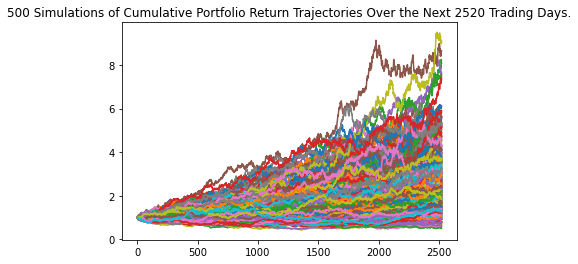

In [35]:
# Plot simulation outcomes
MC_tenyears.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

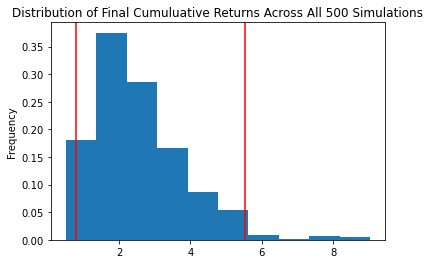

In [36]:
# Plot probability distribution and confidence intervals
MC_tenyears.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyears.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.568311
std               1.307385
min               0.510475
25%               1.638334
50%               2.330477
75%               3.205809
max               9.038041
95% CI Lower      0.806375
95% CI Upper      5.538023
Name: 2520, dtype: float64


In [38]:
# Set initial investment
initial_investment_ten = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment_ten, 2)
ci_upper_ten = round(tbl_ten[9]*initial_investment_ten, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $48382.51 and $332281.38
